# Classification models - Housing values in Boston
# Logistic regression<br>
Using the Boston data set, fit classification models in order to predict
whether a given suburb has a crime rate above or below the median.
Explore logistic regression, LDA, and KNN models using various subsets
of the predictors. Describe your findings.

The variables in the dataset are described below:<br>

**crim**&nbsp;&nbsp;&nbsp;&nbsp;per capita crime rate by town.<br>
**zn**&nbsp;&nbsp;&nbsp;&nbsp;proportion of residential land zoned for lots over 25,000 sq.ft.<br>
**indus**&nbsp;&nbsp;&nbsp;&nbsp;proportion of non-retail business acres per town.<br>
**chas**&nbsp;&nbsp;&nbsp;&nbsp;Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).<br>
**nox**&nbsp;&nbsp;&nbsp;&nbsp;nitrogen oxides concentration (parts per 10 million).<br>
**rm**&nbsp;&nbsp;&nbsp;&nbsp;average number of rooms per dwelling.<br>
**age**&nbsp;&nbsp;&nbsp;&nbsp;proportion of owner-occupied units built prior to 1940.<br>
**dis**&nbsp;&nbsp;&nbsp;&nbsp;weighted mean of distances to five Boston employment centres.<br>
**rad**&nbsp;&nbsp;&nbsp;&nbsp;index of accessibility to radial highways.<br>
**ptratio**&nbsp;&nbsp;&nbsp;&nbsp;pupil-teacher ratio by town.<br>
**black**&nbsp;&nbsp;&nbsp;&nbsp;1000(ðµð‘˜âˆ’0.63)^2 where ðµð‘˜ is the proportion of blacks by town.<br>
**lstat**&nbsp;&nbsp;&nbsp;&nbsp; lower status of the population (percent).<br>
**medv**&nbsp;&nbsp;&nbsp;&nbsp;median value of owner-occupied homes in $1000s.

In [1]:
library(ISLR)
library(MASS)
library(repr)
library(ggplot2)
attach(Boston)
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [2]:
summary(Boston)

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

In [3]:
crime_rate <- rep(0,506)
crime_rate[Boston$crim >median(Boston$crim)]=1
df <- data.frame(Boston, crime_rate)
df$crime_rate <- as.factor(df$crime_rate)
options(repr.plot.width=5, repr.plot.height=4)

### Exploratory data analysis

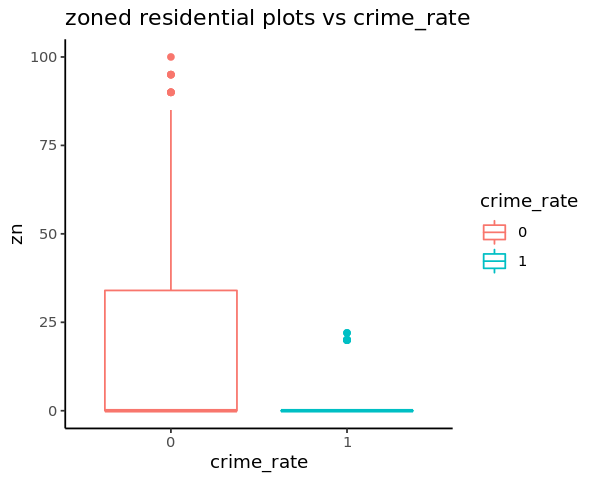

In [4]:
ggplot(df,aes(x=crime_rate,y=zn, color = crime_rate))+geom_boxplot()+theme_classic()+ 
    labs(title="zoned residential plots vs crime_rate")

The plot shows that the median of crime rate is the same in both zoned and non-zoned residential plots of land 

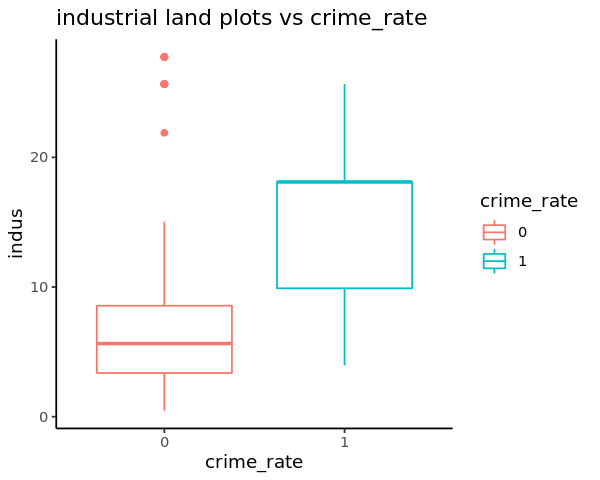

In [5]:
ggplot(df,aes(x=crime_rate,y=indus, color = crime_rate))+geom_boxplot()+theme_classic()+
    labs(title="industrial land plots vs crime_rate")

The plot shows that more crime is committed on industrial land plots compared to residential plots. This is probably due to less traffic of persons around large industrial plots of land

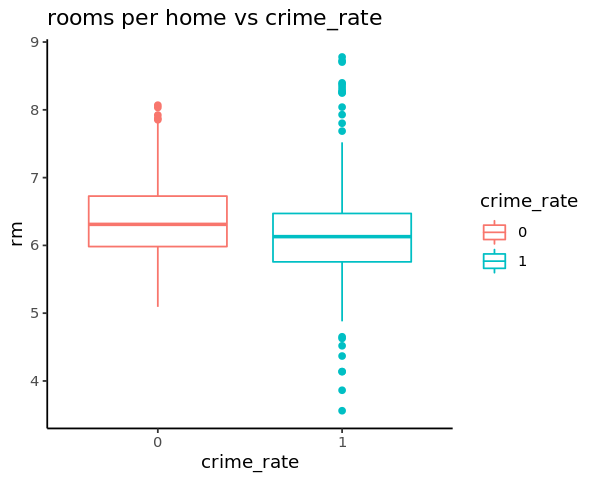

In [6]:
ggplot(df,aes(x=crime_rate,y=rm, color = crime_rate))+geom_boxplot()+theme_classic()+
    labs(title="rooms per home vs crime_rate")

There is slightly higher number of crimes committed by persons living in houses with few number of rooms. Probably , persons living in houses with few rooms belong to low income bracket.

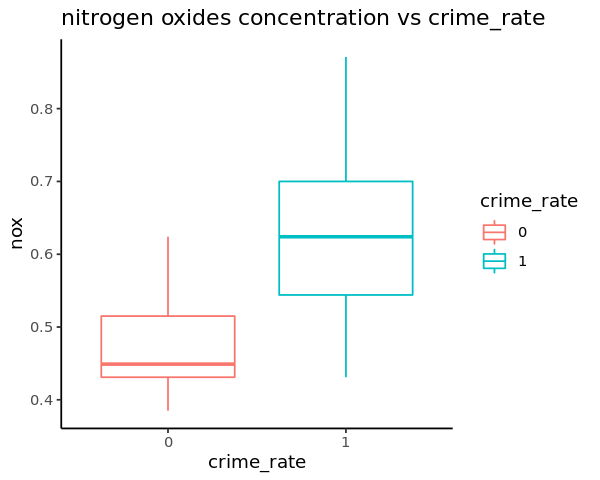

In [7]:
ggplot(df,aes(x=crime_rate,y=nox, color = crime_rate))+geom_boxplot()+theme_classic()+
    labs(title = "nitrogen oxides concentration vs crime_rate")

The plot shows that th median crime rate is higher in locatiosn with higher level of nitrogen oxide concentration. High levels of nitrogen oxide concentartion indicates environmental pollution and poor waste management system which are mostly associated with ghettos. 

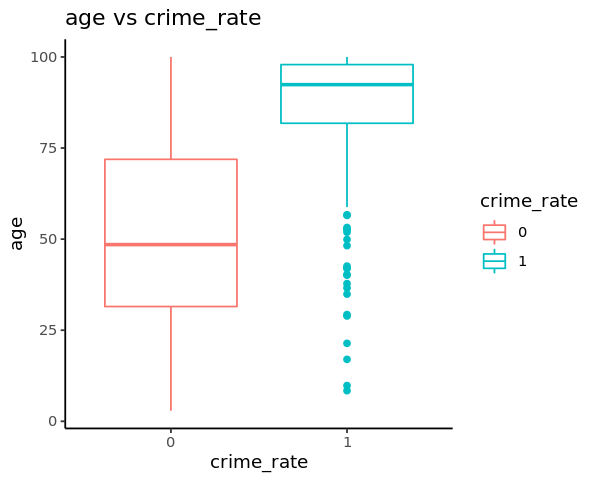

In [8]:
ggplot(df,aes(x=crime_rate,y=age, color = crime_rate))+geom_boxplot()+theme_classic()+
    labs(title = "age vs crime_rate")

The boxplot shows that the older population commit more crimes than the younger population. This does not align with common sense. Probably age does not have significant relationship with crime rate

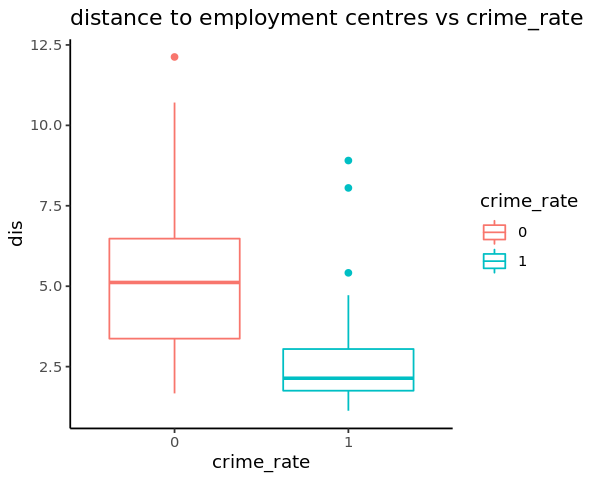

In [9]:
ggplot(df,aes(x=crime_rate,y=dis, color = crime_rate))+geom_boxplot()+theme_classic()+
    labs(title = "distance to employment centres vs crime_rate")

The plot shows that locations that are in close proximity to the employment cemtres have higher crime rate. This could be due to the opening of employment offices in low-income areas to help address the unemployment issues for residents of the areas.

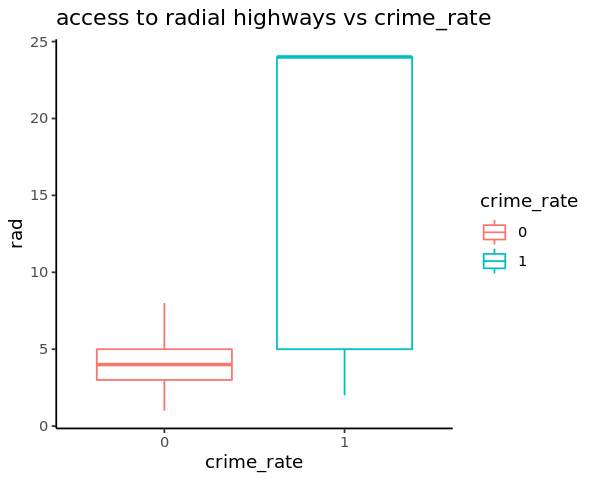

In [10]:
ggplot(df,aes(x=crime_rate,y=rad,color = crime_rate))+geom_boxplot()+theme_classic() +
    labs(title = "access to radial highways vs crime_rate")

The plot shows that access to radial highways increases the crime rate. 

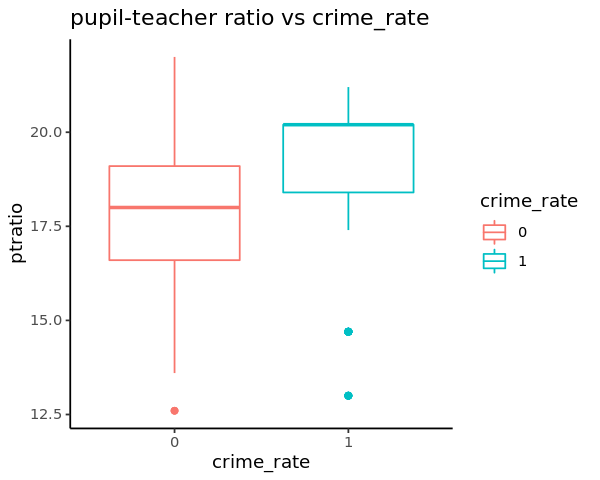

In [11]:
ggplot(df,aes(x=crime_rate,y=ptratio, color = crime_rate))+geom_boxplot()+theme_classic()+
    labs(title = "pupil-teacher ratio vs crime_rate")

The boxplot shows that neighbourhoods with low number of teachers and high number of pupils will have more crime incidents

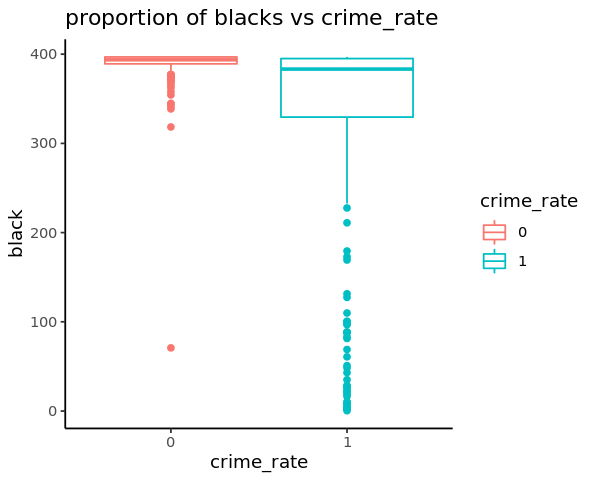

In [12]:
ggplot(df,aes(x=crime_rate,y=black, color = crime_rate))+geom_boxplot()+theme_classic() +
    labs(title = "proportion of blacks vs crime_rate")

The plot shows that towns with higher proportion of black persons have slightly less crime rate than towns with less proportion of black persons.

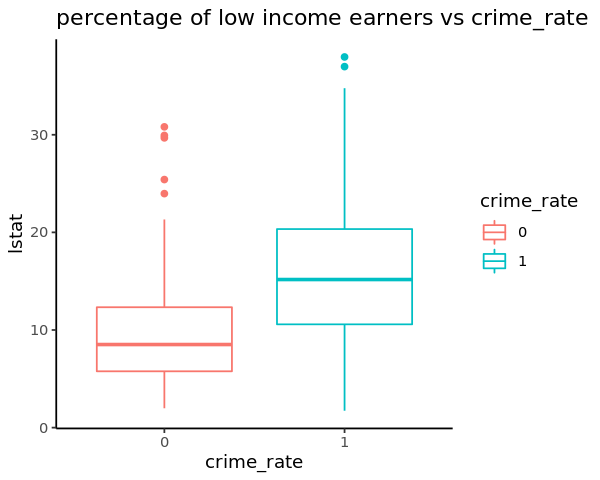

In [13]:
ggplot(df,aes(x=crime_rate,y=lstat, color = crime_rate))+geom_boxplot()+theme_classic()+
    labs(title = "percentage of low income earners vs crime_rate")

Towns with low percentage of individuals earning low income have few incidences of crimes compared to towns with high percentage of low income earners

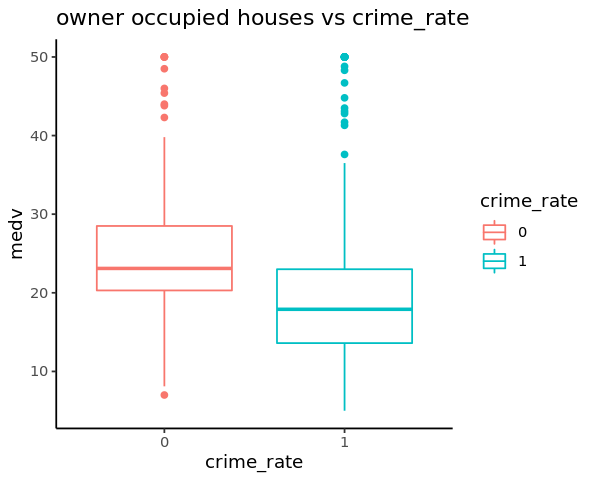

In [14]:
ggplot(df,aes(x=crime_rate,y=medv, color = crime_rate))+geom_boxplot()+theme_classic()+
    labs(title = "owner occupied houses vs crime_rate")

The boxplot shows that neighbourhoods with high number of owner-occupied houses have less criminal disturbances. Probably, these types of neighbourhoods are populated by affluent individuals

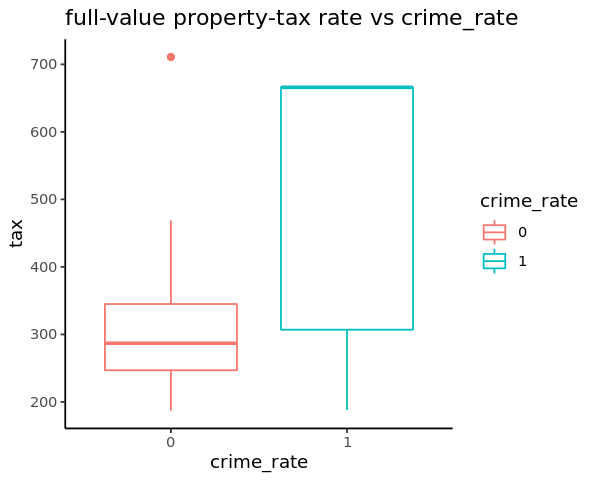

In [15]:
ggplot(df,aes(x=crime_rate,y=tax, color = crime_rate))+geom_boxplot()+theme_classic()+
    labs(title = "full-value property-tax rate vs crime_rate")

The boxplot shows that neighbourhoods with higher property taxes have more crime incidents. This is probably because criminals target the homes of the affluent individuals

### Split the dataset into test and training sets

In [16]:
df_split = sort(sample(nrow(df), nrow(df)*.7)) ## 70% of the dataset randomly selected
train<-df[df_split,]
test<-df[-df_split,]

### Logistic Regression

In [17]:
df_logit <- glm(crime_rate~., data = train,family = binomial(link=logit))
summary(df_logit)

Warning message:
â€œglm.fit: algorithm did not convergeâ€
Warning message:
â€œglm.fit: fitted probabilities numerically 0 or 1 occurredâ€



Call:
glm(formula = crime_rate ~ ., family = binomial(link = logit), 
    data = train)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-2.368e-03  -2.000e-08   2.000e-08   2.000e-08   2.421e-03  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept)   -21.4494 33740.3315  -0.001    0.999
crim          809.9492 15077.5681   0.054    0.957
zn             -1.0698   227.2327  -0.005    0.996
indus          -7.9155   654.1839  -0.012    0.990
chas           16.4108 21366.0358   0.001    0.999
nox           537.5409 99787.3350   0.005    0.996
rm            -25.6455  2466.4669  -0.010    0.992
age             0.6737    96.6542   0.007    0.994
dis             7.6671  1193.8215   0.006    0.995
rad            -4.1685  1124.0562  -0.004    0.997
tax            -0.1800    67.3673  -0.003    0.998
ptratio        36.9763  3047.9676   0.012    0.990
black          -2.4827   196.6435  -0.013    0.990
lstat          -1.9531   322.0313  -0.

The significant predictors of whether the crime rate in a neighbourhood will be either above or below the median crime rate are: nox, dis, rad, ptratio and medv. <br>

The logistic regression model is given as: <br>
**crime_rate = -33.29 + 44.87(nox) + 0.70(dis) + 0.59(rad) + 0.37(ptratio) + 0.24(medv)**

### Odds ratio

In [18]:
data.frame(exp(df_logit$coefficients))

,exp.df_logit.coefficients.
,<dbl>
(Intercept),4.837619e-10
crim,Inf
zn,3.430915e-01
indus,3.650453e-04
chas,1.340060e+07
nox,2.825293e+233
rm,7.282636e-12
age,1.961387e+00
dis,2.136899e+03


**Interpretation**: <br>
- the odds of having a crime rate greater than the median crime rate increases by 2.06 units for every one unit increase in the concentration of nitrogen oxide.
- the odds of having a crime rate greater than the median crime rate increases by 1 unit for every one unit increase in the  weighted mean of distances to five Boston employment centres.
- the odds of having a crime rate greater than the median crime rate increases by 0.81 units for every one unit increase in the index of accessibility to radial highways.
- the odds of having a crime rate greater than the median crime rate increases by 0.45 units for every one unit increase in the  pupil-teacher ratio.
- the odds of having a crime rate greater than the median crime rate increases by 0.26 units for every $1000 increase in the median value of owner-occupied homes.

### Predictive accuracy of model

In [19]:
fitted.results <- predict(df_logit,newdata=test,type='response')
fitted.results <- ifelse(fitted.results > 0.5,1,0)
table(fitted.results,test$crime_rate)
misClasificError <- mean(fitted.results != test$crime_rate)
print(paste('Test error is ',round(misClasificError*100),"%"))
print(paste('Accuracy is ',round((1-misClasificError)*100),"%"))


              
fitted.results  0  1
             0 83  1
             1  3 65

[1] "Test error is  3 %"
[1] "Accuracy is  97 %"
